In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string
import json
import seaborn as sns
from scipy.stats import ttest_1samp

In [2]:
config = json.load(open('../config.json', 'r'))
INPUT_DIR = config['INPUT_DIR']
TWEET_DIR = config['TWEET_DIR']

In [3]:
events = open(INPUT_DIR + 'event_names.txt', 'r').read().splitlines()
shooter_race = json.load(open(INPUT_DIR + "shooters_race.json","r"))

In [24]:
word = 'terrorist'
log_odds_list = []
vocab_size = []
event_names = []
race = []
for e in events:
    # format name
    name = ' '.join(s[0].upper() + s[1:] for s in e.split('_'))
    log_odds = np.load(TWEET_DIR +e+'/'+e+'_vocab_log_odds.npy')
    vocab = open(TWEET_DIR+e+'/'+e+'_vocab.txt', 'r').read().splitlines()
    words2idx = {w: i for i, w in enumerate(vocab)}
    
    # keep words / phrases if they occur at least ten times
    vocab_log_odds = {w: log_odds[3,i] for i, w in enumerate(vocab) if log_odds[0,i]>10}
    if word not in vocab_log_odds:
        print('missing:', name)
        continue
        
    event_names.append(name)
    vocab_size.append(log_odds.shape[1])
    log_odds_list.append(vocab_log_odds[word])
    print(name)
    race.append(shooter_race[e])
df = pd.DataFrame.from_dict({'event': event_names, 'log_odds':log_odds_list, 'vocab_size':vocab_size, 'race':race})
df.sort_values('vocab_size', ascending=False, inplace=True)
print(df)

Chattanooga
Roseburg
Colorado Springs
San Bernardino
Kalamazoo
Orlando
Dallas
Baton Rouge
Burlington
Fort Lauderdale
Fresno
missing: San Francisco
Vegas
Thornton
Sutherland Springs
Parkland
Nashville
Santa Fe
Annapolis
Pittsburgh
Thousand Oaks
                 event  log_odds  vocab_size   race
5              Orlando  0.308304       36966    POC
11               Vegas -0.264375       26604  white
14            Parkland -0.098483        9893  white
6               Dallas  0.168449        5872    POC
13  Sutherland Springs -0.150524        4531  white
19       Thousand Oaks -0.246098        3120  white
16            Santa Fe -0.205688        3016  white
18          Pittsburgh -0.195706        2023  white
3       San Bernardino  0.184183        2010    POC
15           Nashville -0.325540        1733  white
2     Colorado Springs -0.254366        1620  white
7          Baton Rouge  0.279134        1333    POC
17           Annapolis -0.232415        1248  white
0          Chattanooga  0.09

Text(0.5,0,'Log odds ratio of "terrorist"\n(Democrat < 0 < Republican)')

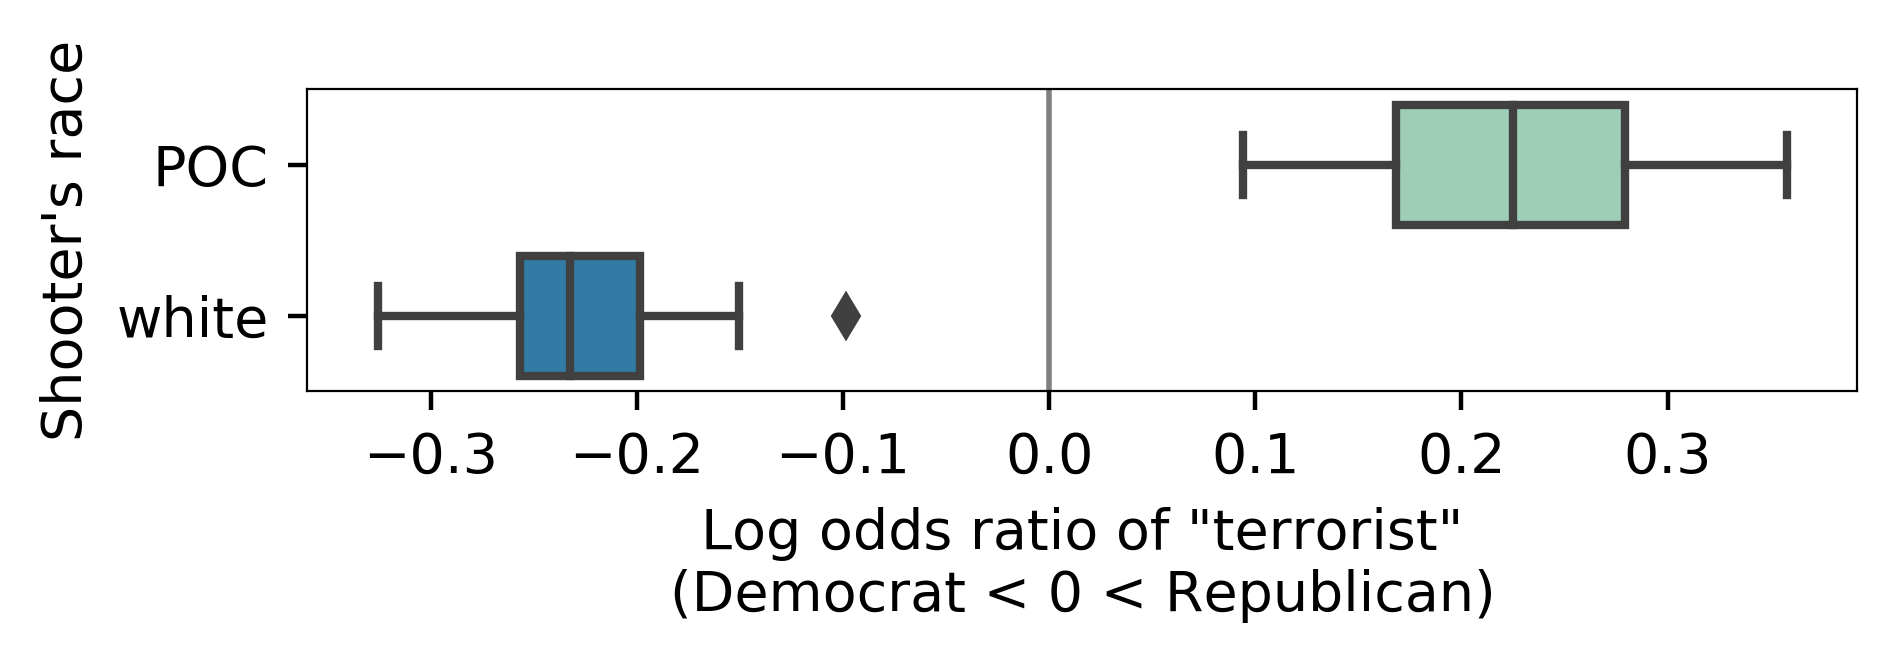

In [25]:
f = plt.figure(dpi=400, figsize=(5,1))
ax = sns.boxplot(data=df, x="log_odds",y='race', orient="h", palette=sns.color_palette("YlGnBu", 2))
ax.plot([0,0], [-1, 20], linewidth=1, color='grey')
ax.set_ylabel("Shooter's race")
ax.spines['top'].set_linewidth(0.4)
ax.spines['right'].set_linewidth(0.4)
ax.spines['bottom'].set_linewidth(0.4)
ax.spines['left'].set_linewidth(0.4)
ax.set_xlabel('Log odds ratio of "'+word+'"\n(Democrat < 0 < Republican)')

In [12]:
for i, g in df.groupby('race'):
    print(i)
    print(ttest_1samp(np.array(g['log_odds']), 0))

POC
Ttest_1sampResult(statistic=-1.7660822681325092, pvalue=0.12072527692513597)
white
Ttest_1sampResult(statistic=3.6709396041707842, pvalue=0.004310419549140847)


## Find words whose use differs the most depending on the shooter's race

In [16]:
# get all words that are not missing from more than three events
no_events = len(events)
shared_vocab = {}
for e in events:
    vocab = open(TWEET_DIR+e+'/'+e+'_vocab.txt', 'r').read().splitlines()
    for w in vocab:
        if w in shared_vocab:
            shared_vocab[w] += 1
        else:
            shared_vocab[w] = 1
shared_vocab = [k for k, v in shared_vocab.items() if v > (no_events-4)]

In [18]:
len(shared_vocab)

195

In [26]:
def get_val(vals):
    return np.abs(np.mean(vals))

In [27]:
words = []
differences = []
for w in shared_vocab:
    print(w)
    odds_white = []
    odds_poc = []
    for e in events:
        # format name
        log_odds = np.load(TWEET_DIR +e+'/'+e+'_vocab_log_odds.npy')
        vocab = open(TWEET_DIR+e+'/'+e+'_vocab.txt', 'r').read().splitlines()
        words2idx = {w: i for i, w in enumerate(vocab)}
    
        # keep words / phrases if they occur at least ten times
        vocab_log_odds = {w: log_odds[3,i] for i, w in enumerate(vocab) if log_odds[0,i]>10}
    
        if w not in vocab_log_odds:
            continue
        if shooter_race[e] == 'white':
            odds_white.append(vocab_log_odds[w])
        else:
            odds_poc.append(vocab_log_odds[w])
        
    words.append(w)
    
    differences.append(get_val(odds_white) * get_val(odds_poc) * (np.sign(np.mean(odds_white)) - np.sign(np.mean(odds_poc))))
df = pd.DataFrame.from_dict({'word': words, 'difference': differences})
print(df)

kill
shooter
famili
victim
attack
gun
4
prayer
shoot
today
terror
terrorist
obama
muslim
thought
shot
gunman
offic
peopl
dead
report
pray
thought prayer
call
news
act
live
polic
white
5
arm
die
heart
2
time
american
day
happen
free
break
god
victim famili
peac
sad
1
activ
media
friend
make
stop
blame
motiv
home
suspect
affect
offici
murder
america
law
injur
love
violenc
man
lost
work
activ shooter
prayer victim
countri
state
killer
hear
fire
guy
#break
mass
confirm
week
citi
wound
show
tweet
tragedi
cnn
control
good
talk
3
watch
involv
give
famili victim
yesterday
wait
identifi
thing
secur
place
death
incid
respons
gun control
support
updat
situat
ap
hate
press
fuck
back
start
morn
target
hope
word
mental
world
end
year
stori
care
heard
send
person
close
find
coverag
great
feel
safe
latest
rt
local
life
problem
tonight
innoc
guess
detail
read
bad
fox
crazi
open
scene
multipl
9
black
minut
post
issu
left
fact
real
shot kill
shit
wrong
crime
area
hour
hey
break news
check
hurt
lot
ppl
tw

In [28]:
df.sort_values('difference', ascending=False)

word  difference
141          crazi    0.015278
129         latest    0.013421
175         #shoot    0.011996
188          fatal    0.011238
66   prayer victim    0.010767
142           open    0.010667
163            lot    0.009998
137         detail    0.009522
73          #break    0.009487
184      open fire    0.009369
98           incid    0.007933
125        coverag    0.007790
130             rt    0.007778
41   victim famili    0.007365
131          local    0.007210
157           area    0.006467
143          scene    0.006425
155          wrong    0.006416
192     peopl dead    0.005890
17           offic    0.005305
54          affect    0.005262
103         situat    0.004890
82             cnn    0.004840
44               1    0.004722
88          involv    0.004135
90   famili victim    0.004104
173           leav    0.003899
117           year    0.003520
191              8    0.003472
158           hour    0.003143
..             ...         ...
95           secur    0.000000
72             guy    0.000000
70            hear    0.000000
104             ap    0.000000
69          killer    0.000000
105           hate    0.000000
106          press    0.000000
67         countri    0.000000
65   activ shooter    0.000000
64            work    0.000000
63            lost    0.000000
62             man    0.000000
61         violenc    0.000000
60            love    0.000000
58             law    0.000000
94           thing    0.000000
108           back   -0.000068
56          murder   -0.000172
42            peac   -0.000360
99         respons   -0.000589
187   shooter kill   -0.000725
174        mention   -0.000794
146          black   -0.005465
28           white   -0.005785
159            hey   -0.005957
136          guess   -0.008052
23            call   -0.010966
10          terror   -0.026577
13          muslim   -0.028964
11       terrorist   -0.097423

[195 rows x 2 columns]

In [29]:
df.sort_values('difference', ascending=True)

word  difference
11       terrorist   -0.097423
13          muslim   -0.028964
10          terror   -0.026577
23            call   -0.010966
136          guess   -0.008052
159            hey   -0.005957
28           white   -0.005785
146          black   -0.005465
174        mention   -0.000794
187   shooter kill   -0.000725
99         respons   -0.000589
42            peac   -0.000360
56          murder   -0.000172
108           back   -0.000068
114         mental    0.000000
113           word    0.000000
115          world    0.000000
119           care    0.000000
120          heard    0.000000
121           send    0.000000
123          close    0.000000
126          great    0.000000
127           feel    0.000000
116            end    0.000000
112           hope    0.000000
0             kill    0.000000
110           morn    0.000000
84            good    0.000000
85            talk    0.000000
89            give    0.000000
..             ...         ...
158           hour    0.003143
191              8    0.003472
117           year    0.003520
173           leav    0.003899
90   famili victim    0.004104
88          involv    0.004135
44               1    0.004722
82             cnn    0.004840
103         situat    0.004890
54          affect    0.005262
17           offic    0.005305
192     peopl dead    0.005890
155          wrong    0.006416
143          scene    0.006425
157           area    0.006467
131          local    0.007210
41   victim famili    0.007365
130             rt    0.007778
125        coverag    0.007790
98           incid    0.007933
184      open fire    0.009369
73          #break    0.009487
137         detail    0.009522
163            lot    0.009998
142           open    0.010667
66   prayer victim    0.010767
188          fatal    0.011238
175         #shoot    0.011996
129         latest    0.013421
141          crazi    0.015278

[195 rows x 2 columns]